In [2]:
%pip install numpy matplotlib ipympl
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def LinearAutocorrelation(buffer, w, tau):
    result = 0
    for i in range(0, w):
        result += buffer[i]*buffer[i+tau]
    return result

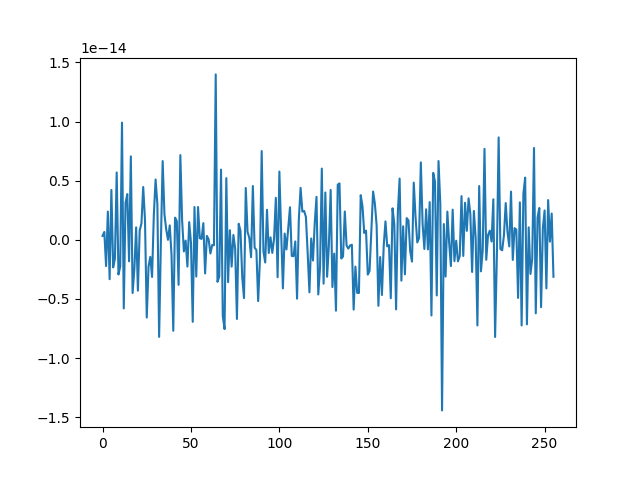

In [14]:
x = np.random.normal(0, 1, 256)
r_x = []

window_size = int(len(x)/2)
for delta in range(0, window_size-1):
    r_x.append(LinearAutocorrelation(x, window_size, delta))

with open("x_c_array.txt", "w") as f:
    f.write("{\n")
    for value in x:
        f.write(f"    {value:.9f},\n")
    f.write("};\n")

X = np.fft.fft(x)
r_x2 = np.fft.ifft(X*np.conj(X))

plt.figure()
plt.plot(r_x2.imag)
#plt.plot(r_x)




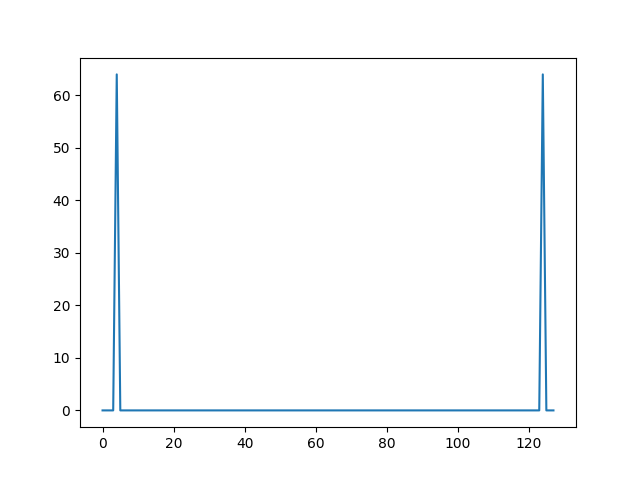

In [6]:
BUFFER_SIZE = 128
bufferIn = []
for i in range(0, BUFFER_SIZE):
    bufferIn.append(np.sin(2*np.pi*i/(float)(BUFFER_SIZE/4)))

plt.figure()
fft = np.fft.fft(bufferIn, n=BUFFER_SIZE)
plt.plot(np.abs(fft))